In [1]:
import json
import pandas as pd
import copy
import glob
import cv2
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
sys.path.append(os.path.join('./','../pyunet'))
from lib.unet import UNet
from modules.train import Train
import torch
from lib.utils import get_image, get_mask, get_predicted_img, dice_score, count_parameters
import glob
from sklearn.model_selection import train_test_split
import shutil
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
img_dir  = "/home/ralampay/workspace/pysplitter/r-images/"
mask_dir = "/home/ralampay/workspace/pysplitter/r-masks/"

tmp_dir = "./tmp"

if os.path.exists(tmp_dir):
    shutil.rmtree(tmp_dir)

train_images_dir = "./tmp/train/images/"
train_masks_dir  = "./tmp/train/masks/"

test_images_dir  = "./tmp/test/images/"
test_masks_dir   = "./tmp/test/masks/"

os.makedirs(train_images_dir)
os.makedirs(train_masks_dir)
os.makedirs(test_images_dir)
os.makedirs(test_masks_dir)

images = sorted(glob.glob("{}/*".format(img_dir)))
masks  = sorted(glob.glob("{}/*".format(mask_dir)))

train_images, test_images, train_masks, test_masks = train_test_split(
    images,
    masks,
    test_size=0.3,
    random_state=42
)

for img_file in train_images:
    shutil.copy(img_file, train_images_dir)
    
for img_file in train_masks:
    shutil.copy(img_file, train_masks_dir)
    
for img_file in test_images:
    shutil.copy(img_file, test_images_dir)
    
for img_file in test_masks:
    shutil.copy(img_file, test_masks_dir)
    
    

In [3]:
img_height     = 128
img_width      = 128
device         = 'cuda'
gpu_index      = 0
input_img_dir  = train_images_dir
input_mask_dir = train_masks_dir
model_file     = "test.pth"
epochs         = 100
learning_rate  = 1e-004
in_channels    = 3
out_channels   = 5
batch_size     = 1
loss_type      = 'CE'
model_type     = 'unet'

params = {
    'img_height':     img_height,
    'img_width':      img_width,
    'device':         device,
    'gpu_index':      gpu_index,
    'input_img_dir':  input_img_dir,
    'input_mask_dir': input_mask_dir,
    'epochs':         epochs,
    'learning_rate':  learning_rate,
    'in_channels':    in_channels,
    'out_channels':   out_channels,
    'loss_type':      loss_type,
    'batch_size':     batch_size,
    'model_file':     model_file,
    'test_img_dir':   test_images_dir,
    'test_mask_dir':  test_masks_dir,
    'model_type':     model_type
}

cmd = Train(params=params)

cmd.execute()

model = cmd.model

num_parameters = count_parameters(model)

print("Number of Parameters: {}".format(num_parameters))

Training model...
input_img_dir: ./tmp/train/images/
input_mask_dir: ./tmp/train/masks/
CUDA Device: NVIDIA GeForce RTX 3050 Laptop GPU
UNet(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
      )
    )
    (2): ConvTranspose2d(512, 256, kernel_size=(2, 2), stride=(2, 2))
    (3): DoubleConv(
      (conv): Sequential(
        (0): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, a

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.82it/s, loss=0.881]


Ave Loss: 1.247292971611023
Ave Accuracy: 0.6878523393110796
Ave F1: 0.31729999992325886
Ave Precision: 0.3786215391662836
Ave Recall: 0.47526287616661933
Ave Specificity: 0.47526287616661933
Saving model to test.pth...
Epoch: 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.04it/s, loss=0.773]


Ave Loss: 1.0107787537574768
Ave Accuracy: 0.7562810724431818
Ave F1: 0.3578171403020923
Ave Precision: 0.42893237572401527
Ave Recall: 0.5057164240139168
Ave Specificity: 0.5057164240139168
Saving model to test.pth...
Epoch: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.36it/s, loss=0.697]


Ave Loss: 0.9010716414451599
Ave Accuracy: 0.7728299227627841
Ave F1: 0.3716819307430559
Ave Precision: 0.4872643629651549
Ave Recall: 0.4876583507959028
Ave Specificity: 0.498124541435254
Saving model to test.pth...
Epoch: 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.26it/s, loss=0.611]


Ave Loss: 0.8190518319606781
Ave Accuracy: 0.8001986416903409
Ave F1: 0.39790512489726315
Ave Precision: 0.48405495449632047
Ave Recall: 0.5090012205881687
Ave Specificity: 0.5208378527308599
Saving model to test.pth...
Epoch: 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.00it/s, loss=0.564]


Ave Loss: 0.7537568145990372
Ave Accuracy: 0.8113819469105114
Ave F1: 0.41240498365138917
Ave Precision: 0.576586269788648
Ave Recall: 0.481495195180174
Ave Specificity: 0.5097552505960622
Saving model to test.pth...
Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.87it/s, loss=0.513]


Ave Loss: 0.6847571414709092
Ave Accuracy: 0.8223960182883523
Ave F1: 0.41884389393612625
Ave Precision: 0.5509144167593504
Ave Recall: 0.49240624251466714
Ave Specificity: 0.5185821854538669
Saving model to test.pth...
Epoch: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.30it/s, loss=0.475]


Ave Loss: 0.6401606690883637
Ave Accuracy: 0.830078125
Ave F1: 0.42626371554842973
Ave Precision: 0.5635209413897244
Ave Recall: 0.5038885359396738
Ave Specificity: 0.5251824772098174
Saving model to test.pth...
Epoch: 7


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.84it/s, loss=0.426]


Ave Loss: 0.5912577259540558
Ave Accuracy: 0.8291404030539773
Ave F1: 0.42474496582943255
Ave Precision: 0.5953488824707691
Ave Recall: 0.485095266526671
Ave Specificity: 0.5136406546564175
Saving model to test.pth...
Epoch: 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.58it/s, loss=0.418]


Ave Loss: 0.5638070714473724
Ave Accuracy: 0.8198935768821023
Ave F1: 0.4263799914675286
Ave Precision: 0.5108986563447901
Ave Recall: 0.5116172890180533
Ave Specificity: 0.5285333497195156
Saving model to test.pth...
Epoch: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.10it/s, loss=0.369]


Ave Loss: 0.5348266410827637
Ave Accuracy: 0.8373440829190341
Ave F1: 0.4361163816419707
Ave Precision: 0.5766770787782913
Ave Recall: 0.5069725557756845
Ave Specificity: 0.5282670391908689
Saving model to test.pth...
Epoch: 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.08it/s, loss=0.353]


Ave Loss: 0.49443846762180327
Ave Accuracy: 0.8359097567471591
Ave F1: 0.44827145451449957
Ave Precision: 0.5806808372046052
Ave Recall: 0.5033829264472933
Ave Specificity: 0.5321453933976931
Saving model to test.pth...
Epoch: 11


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.23it/s, loss=0.325]


Ave Loss: 0.4596999064087868
Ave Accuracy: 0.845245361328125
Ave F1: 0.4514069663462788
Ave Precision: 0.6101828553921451
Ave Recall: 0.5006161549146635
Ave Specificity: 0.5304694869491704
Saving model to test.pth...
Epoch: 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.53it/s, loss=0.298]


Ave Loss: 0.4278467416763306
Ave Accuracy: 0.8346529873934659
Ave F1: 0.44708110780936033
Ave Precision: 0.6056756243482068
Ave Recall: 0.5113352834565845
Ave Specificity: 0.5347481322398372
Saving model to test.pth...
Epoch: 13


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.92it/s, loss=0.285]


Ave Loss: 0.39691706776618957
Ave Accuracy: 0.8345225941051136
Ave F1: 0.4476976227622788
Ave Precision: 0.5815265179318815
Ave Recall: 0.5071425853686964
Ave Specificity: 0.530909154686218
Saving model to test.pth...
Epoch: 14


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.91it/s, loss=0.255]


Ave Loss: 0.37692655324935914
Ave Accuracy: 0.8409090909090909
Ave F1: 0.45871345007268133
Ave Precision: 0.5766973887393868
Ave Recall: 0.5174714387292969
Ave Specificity: 0.5416795771895045
Saving model to test.pth...
Epoch: 15


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.58it/s, loss=0.234]


Ave Loss: 0.3588654747605324
Ave Accuracy: 0.8464299982244318
Ave F1: 0.47744606284932867
Ave Precision: 0.6204573902995052
Ave Recall: 0.5109314881222171
Ave Specificity: 0.5438330558899643
Saving model to test.pth...
Epoch: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.57it/s, loss=0.225]


Ave Loss: 0.3355700549483299
Ave Accuracy: 0.8354464444247159
Ave F1: 0.44575410990864284
Ave Precision: 0.5321618903669397
Ave Recall: 0.5338790600963106
Ave Specificity: 0.5434956041303001
Saving model to test.pth...
Epoch: 17


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.11it/s, loss=0.217]


Ave Loss: 0.3186908906698227
Ave Accuracy: 0.8350053267045454
Ave F1: 0.45203732326362833
Ave Precision: 0.5077600273723964
Ave Recall: 0.5489066045342156
Ave Specificity: 0.5542417685480682
Saving model to test.pth...
Epoch: 18


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.37it/s, loss=0.198]


Ave Loss: 0.30262254625558854
Ave Accuracy: 0.8449207652698864
Ave F1: 0.45477047030868234
Ave Precision: 0.5231679765616971
Ave Recall: 0.5497248747127936
Ave Specificity: 0.5549707168850402
Saving model to test.pth...
Epoch: 19


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.72it/s, loss=0.194]


Ave Loss: 0.2947730976343155
Ave Accuracy: 0.8434198552911932
Ave F1: 0.4643287138711644
Ave Precision: 0.569516269205369
Ave Recall: 0.5330361546294101
Ave Specificity: 0.5492359743794436
Saving model to test.pth...
Epoch: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.82it/s, loss=0.201]


Ave Loss: 0.28051665470004084
Ave Accuracy: 0.8445795232599432
Ave F1: 0.4486376241542715
Ave Precision: 0.5755425231038468
Ave Recall: 0.5324115286630998
Ave Specificity: 0.5443638511084088
Saving model to test.pth...
Epoch: 21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.82it/s, loss=0.171]


Ave Loss: 0.26525270611047747
Ave Accuracy: 0.8505276766690341
Ave F1: 0.4616871670523267
Ave Precision: 0.5644442115794747
Ave Recall: 0.5398870242999806
Ave Specificity: 0.5518181878865998
Saving model to test.pth...
Epoch: 22


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.73it/s, loss=0.158]


Ave Loss: 0.24930695220828056
Ave Accuracy: 0.8485939719460227
Ave F1: 0.4719602614306671
Ave Precision: 0.5437216465273876
Ave Recall: 0.5392548639565816
Ave Specificity: 0.5562470116655269
Saving model to test.pth...
Epoch: 23


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.88it/s, loss=0.146]


Ave Loss: 0.23458850756287575
Ave Accuracy: 0.8479503284801136
Ave F1: 0.4516309090102984
Ave Precision: 0.5625767814154862
Ave Recall: 0.5227938053539134
Ave Specificity: 0.5352647468363141
Saving model to test.pth...
Epoch: 24


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.12it/s, loss=0.145]


Ave Loss: 0.22458193689584732
Ave Accuracy: 0.8523531827059659
Ave F1: 0.45431956432809417
Ave Precision: 0.566474150480974
Ave Recall: 0.5346991137981459
Ave Specificity: 0.5474840361953217
Saving model to test.pth...
Epoch: 25


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.34it/s, loss=0.135]


Ave Loss: 0.2166985562443733
Ave Accuracy: 0.8549305308948864
Ave F1: 0.45062668635691716
Ave Precision: 0.6109248431693101
Ave Recall: 0.521465227627523
Ave Specificity: 0.5404547155484584
Saving model to test.pth...
Epoch: 26


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.26it/s, loss=0.125]


Ave Loss: 0.20683023676276208
Ave Accuracy: 0.8583845658735796
Ave F1: 0.446847856993922
Ave Precision: 0.6255804850185354
Ave Recall: 0.514659446332332
Ave Specificity: 0.5335677987168752
Saving model to test.pth...
Epoch: 27


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.08it/s, loss=0.129]


Ave Loss: 0.2042914779484272
Ave Accuracy: 0.8506719415838068
Ave F1: 0.4379584555421116
Ave Precision: 0.5775515492539556
Ave Recall: 0.5238943727791189
Ave Specificity: 0.531508762065247
Saving model to test.pth...
Epoch: 28


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.08it/s, loss=0.135]


Ave Loss: 0.2033416835963726
Ave Accuracy: 0.8423600630326704
Ave F1: 0.4444426771795
Ave Precision: 0.5468053736035899
Ave Recall: 0.5294765399695099
Ave Specificity: 0.5374076278224168
Saving model to test.pth...
Epoch: 29


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.87it/s, loss=0.133]


Ave Loss: 0.1955277882516384
Ave Accuracy: 0.8477783203125
Ave F1: 0.4457833640384512
Ave Precision: 0.5995369203069061
Ave Recall: 0.5129219255480255
Ave Specificity: 0.5294124005726626
Saving model to test.pth...
Epoch: 30


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.62it/s, loss=0.115]


Ave Loss: 0.18144190698862075
Ave Accuracy: 0.8497536399147727
Ave F1: 0.45490973935140866
Ave Precision: 0.6338743538856876
Ave Recall: 0.5066506583076809
Ave Specificity: 0.534083755857632
Saving model to test.pth...
Epoch: 31


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.22it/s, loss=0.103]


Ave Loss: 0.16789084382355213
Ave Accuracy: 0.8504805131392046
Ave F1: 0.45037299420247034
Ave Precision: 0.6037254600965593
Ave Recall: 0.5202829680314088
Ave Specificity: 0.5397634703615432
Saving model to test.pth...
Epoch: 32


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.61it/s, loss=0.097]


Ave Loss: 0.16164937600493431
Ave Accuracy: 0.840972900390625
Ave F1: 0.4323869251043252
Ave Precision: 0.614182580438766
Ave Recall: 0.5008782619424741
Ave Specificity: 0.5250785104703392
Saving model to test.pth...
Epoch: 33


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.05it/s, loss=0.109]


Ave Loss: 0.1592126728594303
Ave Accuracy: 0.8400351784446023
Ave F1: 0.4318379471737552
Ave Precision: 0.6294667615806161
Ave Recall: 0.5148317993938449
Ave Specificity: 0.5334355197493905
Saving model to test.pth...
Epoch: 34


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.10it/s, loss=0.103]


Ave Loss: 0.16328866124153138
Ave Accuracy: 0.8470930619673296
Ave F1: 0.43995261283290577
Ave Precision: 0.590942771118067
Ave Recall: 0.5240257837858922
Ave Specificity: 0.534430202751987
Saving model to test.pth...
Epoch: 35


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.62it/s, loss=0.0914]


Ave Loss: 0.15292067900300027
Ave Accuracy: 0.843658447265625
Ave F1: 0.431640648321437
Ave Precision: 0.588502348275656
Ave Recall: 0.520204134919838
Ave Specificity: 0.5329515936683408
Saving model to test.pth...
Epoch: 36


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.18it/s, loss=0.158]


Ave Loss: 0.16496000409126282
Ave Accuracy: 0.8069319291548296
Ave F1: 0.4311058209046838
Ave Precision: 0.5200643483257867
Ave Recall: 0.5482364698807441
Ave Specificity: 0.5528708189416612
Saving model to test.pth...
Epoch: 37


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.97it/s, loss=0.251]


Ave Loss: 0.37544788151979447
Ave Accuracy: 0.8389504172585227
Ave F1: 0.4418026793621467
Ave Precision: 0.5166338124552229
Ave Recall: 0.5481622898715555
Ave Specificity: 0.5562466018002407
Saving model to test.pth...
Epoch: 38


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.35it/s, loss=0.154]


Ave Loss: 0.2771287712454796
Ave Accuracy: 0.8482555042613636
Ave F1: 0.45185057882864366
Ave Precision: 0.5330204751512135
Ave Recall: 0.5344423957669748
Ave Specificity: 0.5448230511295379
Saving model to test.pth...
Epoch: 39


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.27it/s, loss=0.0991]


Ave Loss: 0.18477736815810203
Ave Accuracy: 0.8551108620383523
Ave F1: 0.4419846107413617
Ave Precision: 0.5510283371173309
Ave Recall: 0.5419958339001668
Ave Specificity: 0.5445985128930024
Saving model to test.pth...
Epoch: 40


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.16it/s, loss=0.0899]


Ave Loss: 0.14765882924199103
Ave Accuracy: 0.8556185635653409
Ave F1: 0.4440128451869941
Ave Precision: 0.5528270002445219
Ave Recall: 0.5300112174043786
Ave Specificity: 0.5379145715922968
Saving model to test.pth...
Epoch: 41


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.87it/s, loss=0.0817]


Ave Loss: 0.13260604739189147
Ave Accuracy: 0.8531494140625
Ave F1: 0.4482974123496426
Ave Precision: 0.5640811515802165
Ave Recall: 0.5298442223383192
Ave Specificity: 0.5419409423576943
Saving model to test.pth...
Epoch: 42


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.89it/s, loss=0.0754]


Ave Loss: 0.12498535491526126
Ave Accuracy: 0.8496676358309659
Ave F1: 0.4476367790352439
Ave Precision: 0.5526203804908317
Ave Recall: 0.5349589594654606
Ave Specificity: 0.5477773183703529
Saving model to test.pth...
Epoch: 43


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.69it/s, loss=0.0749]


Ave Loss: 0.12053987130522728
Ave Accuracy: 0.84759521484375
Ave F1: 0.4495997368405573
Ave Precision: 0.5496828707248004
Ave Recall: 0.544252431018553
Ave Specificity: 0.5521341893411444
Saving model to test.pth...
Epoch: 44


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.91it/s, loss=0.0715]


Ave Loss: 0.11727610170841217
Ave Accuracy: 0.8505138050426136
Ave F1: 0.453106473121629
Ave Precision: 0.5507034486152365
Ave Recall: 0.5460331239407755
Ave Specificity: 0.5512602407591228
Saving model to test.pth...
Epoch: 45


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.14it/s, loss=0.078]


Ave Loss: 0.11515526682138442
Ave Accuracy: 0.852081298828125
Ave F1: 0.4503991830336606
Ave Precision: 0.5492023761507696
Ave Recall: 0.5445955160400398
Ave Specificity: 0.5496704602549545
Saving model to test.pth...
Epoch: 46


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.62it/s, loss=0.0742]


Ave Loss: 0.11300495006144047
Ave Accuracy: 0.8533186479048296
Ave F1: 0.44351788260024705
Ave Precision: 0.5406612247172295
Ave Recall: 0.5480749537818705
Ave Specificity: 0.5532106830831188
Saving model to test.pth...
Epoch: 47


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.55it/s, loss=0.0714]


Ave Loss: 0.10916947074234486
Ave Accuracy: 0.8572803844105114
Ave F1: 0.4570642175674195
Ave Precision: 0.5687828446561063
Ave Recall: 0.5479186410867456
Ave Specificity: 0.5578567366845294
Saving model to test.pth...
Epoch: 48


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.00it/s, loss=0.066]


Ave Loss: 0.10731404460966587
Ave Accuracy: 0.8584788929332386
Ave F1: 0.46491209578224363
Ave Precision: 0.5397758949934673
Ave Recall: 0.5642390080578585
Ave Specificity: 0.566730122243708
Saving model to test.pth...
Epoch: 49


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.61it/s, loss=0.0653]


Ave Loss: 0.10532437786459922
Ave Accuracy: 0.8558183149857954
Ave F1: 0.46391060371756565
Ave Precision: 0.5356475689000152
Ave Recall: 0.5491496164054465
Ave Specificity: 0.5594337325155624
Saving model to test.pth...
Epoch: 50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.32it/s, loss=0.0621]


Ave Loss: 0.10104639180004597
Ave Accuracy: 0.8565340909090909
Ave F1: 0.4642732308086713
Ave Precision: 0.5428323402170467
Ave Recall: 0.5500893523053016
Ave Specificity: 0.5591028663768731
Saving model to test.pth...
Epoch: 51


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.91it/s, loss=0.0621]


Ave Loss: 0.09826619267463683
Ave Accuracy: 0.8571971546519886
Ave F1: 0.48397726910116295
Ave Precision: 0.5733081607497038
Ave Recall: 0.5521958462827757
Ave Specificity: 0.572812441569748
Saving model to test.pth...
Epoch: 52


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.83it/s, loss=0.0615]


Ave Loss: 0.09527545906603337
Ave Accuracy: 0.8536765358664773
Ave F1: 0.472625270998431
Ave Precision: 0.5396380182192037
Ave Recall: 0.5701631805289142
Ave Specificity: 0.5800696502784582
Saving model to test.pth...
Epoch: 53


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.88it/s, loss=0.0587]


Ave Loss: 0.09464838974177837
Ave Accuracy: 0.85565185546875
Ave F1: 0.468642410332752
Ave Precision: 0.5449294475829918
Ave Recall: 0.5600219910345884
Ave Specificity: 0.5702966331068209
Saving model to test.pth...
Epoch: 54


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.09it/s, loss=0.0611]


Ave Loss: 0.09607987828552723
Ave Accuracy: 0.8546225807883523
Ave F1: 0.4580561169827893
Ave Precision: 0.5330893462677577
Ave Recall: 0.5468864069090489
Ave Specificity: 0.5570045187545539
Saving model to test.pth...
Epoch: 55


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.40it/s, loss=0.061]


Ave Loss: 0.09212843962013721
Ave Accuracy: 0.8506303267045454
Ave F1: 0.4618190160525338
Ave Precision: 0.530486081067397
Ave Recall: 0.5645497554775019
Ave Specificity: 0.5722491664305913
Saving model to test.pth...
Epoch: 56


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.53it/s, loss=0.0521]


Ave Loss: 0.08639226373285055
Ave Accuracy: 0.8483220880681818
Ave F1: 0.45988999410926473
Ave Precision: 0.5380647364411781
Ave Recall: 0.5778143368415316
Ave Specificity: 0.5804400754915323
Saving model to test.pth...
Epoch: 57


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.65it/s, loss=0.05]


Ave Loss: 0.08277646228671073
Ave Accuracy: 0.8517650257457386
Ave F1: 0.46461095121249885
Ave Precision: 0.5237809566693258
Ave Recall: 0.5670287935394462
Ave Specificity: 0.5743621576261414
Saving model to test.pth...
Epoch: 58


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.73it/s, loss=0.0474]


Ave Loss: 0.07974484607577324
Ave Accuracy: 0.8479558771306818
Ave F1: 0.4610166840708802
Ave Precision: 0.5377007846775289
Ave Recall: 0.5662983307079064
Ave Specificity: 0.5734419241976088
Saving model to test.pth...
Epoch: 59


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.40it/s, loss=0.0483]


Ave Loss: 0.07849915206432342
Ave Accuracy: 0.8485329367897727
Ave F1: 0.46812640357139407
Ave Precision: 0.5111037976358666
Ave Recall: 0.5729068276845295
Ave Specificity: 0.5800080612056333
Saving model to test.pth...
Epoch: 60


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.02it/s, loss=0.0505]


Ave Loss: 0.07629784855991602
Ave Accuracy: 0.8502863103693182
Ave F1: 0.46539798971879875
Ave Precision: 0.49884353982391705
Ave Recall: 0.5848738932072652
Ave Specificity: 0.5848738932072652
Saving model to test.pth...
Epoch: 61


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.32it/s, loss=0.0455]


Ave Loss: 0.07618865367025136
Ave Accuracy: 0.8544561212713068
Ave F1: 0.47594836771255955
Ave Precision: 0.5256255994581656
Ave Recall: 0.5850122787948053
Ave Specificity: 0.5873726648071393
Saving model to test.pth...
Epoch: 62


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.20it/s, loss=0.0454]


Ave Loss: 0.07745350778102875
Ave Accuracy: 0.845672607421875
Ave F1: 0.46223552826083336
Ave Precision: 0.510932770297245
Ave Recall: 0.5852535326699622
Ave Specificity: 0.5876192483657925
Saving model to test.pth...
Epoch: 63


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.52it/s, loss=0.0466]


Ave Loss: 0.07652558378875256
Ave Accuracy: 0.8515153364701704
Ave F1: 0.4674047642823807
Ave Precision: 0.512707586520449
Ave Recall: 0.5817151377594185
Ave Specificity: 0.5839536219668825
Saving model to test.pth...
Epoch: 64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.90it/s, loss=0.0447]


Ave Loss: 0.07734100975096225
Ave Accuracy: 0.8508938876065341
Ave F1: 0.4576736919655191
Ave Precision: 0.5285574512842767
Ave Recall: 0.5721135827554025
Ave Specificity: 0.5744597798158021
Saving model to test.pth...
Epoch: 65


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.02it/s, loss=0.0516]


Ave Loss: 0.07681922499090434
Ave Accuracy: 0.8513599742542614
Ave F1: 0.45906506190412927
Ave Precision: 0.5137431751444341
Ave Recall: 0.5769251505443609
Ave Specificity: 0.5769251505443609
Saving model to test.pth...
Epoch: 66


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.72it/s, loss=0.0505]


Ave Loss: 0.07681455429643393
Ave Accuracy: 0.8535433682528409
Ave F1: 0.4675031033184766
Ave Precision: 0.5127041043373582
Ave Recall: 0.5772341950779302
Ave Specificity: 0.5795713712520206
Saving model to test.pth...
Epoch: 67


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.64it/s, loss=0.0488]


Ave Loss: 0.07573864165693521
Ave Accuracy: 0.8528026234019886
Ave F1: 0.4552962172111739
Ave Precision: 0.5143247145184929
Ave Recall: 0.5613010295473946
Ave Specificity: 0.5638004028074897
Saving model to test.pth...
Epoch: 68


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.24it/s, loss=0.0452]


Ave Loss: 0.07289862047880888
Ave Accuracy: 0.8506608442826704
Ave F1: 0.45391681111408605
Ave Precision: 0.5405055988308017
Ave Recall: 0.5498435387574654
Ave Specificity: 0.5597725819902188
Saving model to test.pth...
Epoch: 69


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.77it/s, loss=0.0494]


Ave Loss: 0.073430306725204
Ave Accuracy: 0.8443686745383523
Ave F1: 0.4580442535177657
Ave Precision: 0.5386093587061221
Ave Recall: 0.5523524607247268
Ave Specificity: 0.5644660998301286
Saving model to test.pth...
Epoch: 70


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.48it/s, loss=0.0552]


Ave Loss: 0.0702128927782178
Ave Accuracy: 0.8453896262428977
Ave F1: 0.45022102945462394
Ave Precision: 0.5009869265149437
Ave Recall: 0.5541186703178721
Ave Specificity: 0.5590444011829107
Saving model to test.pth...
Epoch: 71


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.34it/s, loss=0.0473]


Ave Loss: 0.06657326579093933
Ave Accuracy: 0.8477394797585227
Ave F1: 0.4594682416960083
Ave Precision: 0.517033639104317
Ave Recall: 0.551965695452052
Ave Specificity: 0.5597874024595653
Saving model to test.pth...
Epoch: 72


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.28it/s, loss=0.0389]


Ave Loss: 0.06421515729278326
Ave Accuracy: 0.8419938520951704
Ave F1: 0.4506921407242315
Ave Precision: 0.5254032795309379
Ave Recall: 0.5590808365262843
Ave Specificity: 0.5616511830112645
Saving model to test.pth...
Epoch: 73


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.17it/s, loss=0.0359]


Ave Loss: 0.06173942033201456
Ave Accuracy: 0.8434032093394886
Ave F1: 0.45288741978593466
Ave Precision: 0.5191534866745852
Ave Recall: 0.5673448138513921
Ave Specificity: 0.5698723567329759
Saving model to test.pth...
Epoch: 74


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.37it/s, loss=0.0393]


Ave Loss: 0.06046723805367946
Ave Accuracy: 0.8460804332386364
Ave F1: 0.4512460728476192
Ave Precision: 0.5305322545882115
Ave Recall: 0.5666555156184431
Ave Specificity: 0.5666555156184431
Saving model to test.pth...
Epoch: 75


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.17it/s, loss=0.0426]


Ave Loss: 0.060886907801032064
Ave Accuracy: 0.8480252352627841
Ave F1: 0.44901238337696564
Ave Precision: 0.5210265641864426
Ave Recall: 0.5571766177189182
Ave Specificity: 0.5571766177189182
Saving model to test.pth...
Epoch: 76


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.43it/s, loss=0.0415]


Ave Loss: 0.05972600169479847
Ave Accuracy: 0.8504749644886364
Ave F1: 0.4499826775711014
Ave Precision: 0.501738640970933
Ave Recall: 0.5559551065863076
Ave Specificity: 0.5559551065863076
Saving model to test.pth...
Epoch: 77


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.90it/s, loss=0.0326]


Ave Loss: 0.05859753955155611
Ave Accuracy: 0.8523670543323864
Ave F1: 0.4550604272617091
Ave Precision: 0.5080192802914404
Ave Recall: 0.5634150230015792
Ave Specificity: 0.565992496189296
Saving model to test.pth...
Epoch: 78


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.30it/s, loss=0.0398]


Ave Loss: 0.06269215777516365
Ave Accuracy: 0.847442626953125
Ave F1: 0.45598972763436235
Ave Precision: 0.5193246483759654
Ave Recall: 0.5625629212631565
Ave Specificity: 0.5650369516024585
Saving model to test.pth...
Epoch: 79


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.70it/s, loss=0.0434]


Ave Loss: 0.061070611719042066
Ave Accuracy: 0.8472622958096591
Ave F1: 0.4483311658096536
Ave Precision: 0.5276207002565009
Ave Recall: 0.5391775865700459
Ave Specificity: 0.549442036654098
Saving model to test.pth...
Epoch: 80


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.69it/s, loss=0.04]


Ave Loss: 0.05754631847143173
Ave Accuracy: 0.8520923961292614
Ave F1: 0.43895599296402277
Ave Precision: 0.5090805622382311
Ave Recall: 0.5450393525642103
Ave Specificity: 0.5450393525642103
Saving model to test.pth...
Epoch: 81


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.04it/s, loss=0.0507]


Ave Loss: 0.06145430736243725
Ave Accuracy: 0.8398104580965909
Ave F1: 0.44669756230429375
Ave Precision: 0.49844686998839566
Ave Recall: 0.5487344895573872
Ave Specificity: 0.551321188908236
Saving model to test.pth...
Epoch: 82


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.98it/s, loss=0.047]


Ave Loss: 0.06941177621483803
Ave Accuracy: 0.8455727317116477
Ave F1: 0.45773972508167077
Ave Precision: 0.5152205505978421
Ave Recall: 0.5531351010649215
Ave Specificity: 0.5557091507749452
Saving model to test.pth...
Epoch: 83


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.39it/s, loss=0.0373]


Ave Loss: 0.061442430652678015
Ave Accuracy: 0.8514515269886364
Ave F1: 0.45524492684738344
Ave Precision: 0.5484830701012907
Ave Recall: 0.5460295971501736
Ave Specificity: 0.5558372260744577
Saving model to test.pth...
Epoch: 84


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.05it/s, loss=0.0358]


Ave Loss: 0.05891591046005487
Ave Accuracy: 0.8427040793678977
Ave F1: 0.44207086219549957
Ave Precision: 0.5203092882600987
Ave Recall: 0.5522244812433356
Ave Specificity: 0.5547915613094498
Saving model to test.pth...
Epoch: 85


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.95it/s, loss=0.0508]


Ave Loss: 0.057846335992217064
Ave Accuracy: 0.8459916548295454
Ave F1: 0.4511503539096756
Ave Precision: 0.5242573090886121
Ave Recall: 0.5496285795944762
Ave Specificity: 0.5569625020713326
Saving model to test.pth...
Epoch: 86


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 16.28it/s, loss=0.0444]


Ave Loss: 0.05806146375834942
Ave Accuracy: 0.8414778275923296
Ave F1: 0.4315823858506603
Ave Precision: 0.49816282615865914
Ave Recall: 0.5369087807422186
Ave Specificity: 0.5369087807422186
Saving model to test.pth...
Epoch: 87


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.37it/s, loss=0.0366]


Ave Loss: 0.05681571623310447
Ave Accuracy: 0.8406316583806818
Ave F1: 0.44879756424836725
Ave Precision: 0.4927117123934618
Ave Recall: 0.5554765324574779
Ave Specificity: 0.5554765324574779
Saving model to test.pth...
Epoch: 88


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.11it/s, loss=0.0467]


Ave Loss: 0.060841431524604556
Ave Accuracy: 0.8389448686079546
Ave F1: 0.45376833150199575
Ave Precision: 0.49572170046256053
Ave Recall: 0.5689076900279033
Ave Specificity: 0.5715788249850549
Saving model to test.pth...
Epoch: 89


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.06it/s, loss=0.0451]


Ave Loss: 0.05977890532463789
Ave Accuracy: 0.8457447398792614
Ave F1: 0.45471597775379474
Ave Precision: 0.5094272011621265
Ave Recall: 0.5688448681757211
Ave Specificity: 0.5714333918263168
Saving model to test.pth...
Epoch: 90


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.10it/s, loss=0.0359]


Ave Loss: 0.05378904143348336
Ave Accuracy: 0.8504499955610796
Ave F1: 0.4548442217630902
Ave Precision: 0.5214406607508679
Ave Recall: 0.5588446219696919
Ave Specificity: 0.5614819942206852
Saving model to test.pth...
Epoch: 91


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.22it/s, loss=0.0352]


Ave Loss: 0.0480299336835742
Ave Accuracy: 0.8568586869673296
Ave F1: 0.46332719113964704
Ave Precision: 0.5068321257014259
Ave Recall: 0.5716006833605831
Ave Specificity: 0.5716006833605831
Saving model to test.pth...
Epoch: 92


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.09it/s, loss=0.0262]


Ave Loss: 0.04345981849357486
Ave Accuracy: 0.8504000577059659
Ave F1: 0.46254862941907837
Ave Precision: 0.511304098063408
Ave Recall: 0.5785853398668155
Ave Specificity: 0.5785853398668155
Saving model to test.pth...
Epoch: 93


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.34it/s, loss=0.0249]


Ave Loss: 0.041684814617037776
Ave Accuracy: 0.8484302867542614
Ave F1: 0.45677990889154624
Ave Precision: 0.5245836561335635
Ave Recall: 0.5686175196565375
Ave Specificity: 0.5686175196565375
Saving model to test.pth...
Epoch: 94


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 17.05it/s, loss=0.0267]


Ave Loss: 0.03981094663962722
Ave Accuracy: 0.8449318625710227
Ave F1: 0.4453004393694414
Ave Precision: 0.49780377052295677
Ave Recall: 0.5546407242251041
Ave Specificity: 0.5546407242251041
Saving model to test.pth...
Epoch: 95


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 16.67it/s, loss=0.0255]


Ave Loss: 0.03946387831121683
Ave Accuracy: 0.8483165394176136
Ave F1: 0.4520380354782814
Ave Precision: 0.49513251812097286
Ave Recall: 0.5672140985130534
Ave Specificity: 0.5672140985130534
Saving model to test.pth...
Epoch: 96


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.71it/s, loss=0.0253]


Ave Loss: 0.039705229960381984
Ave Accuracy: 0.8461997292258523
Ave F1: 0.45237715581085725
Ave Precision: 0.4990752164191576
Ave Recall: 0.5722976692899893
Ave Specificity: 0.5722976692899893
Saving model to test.pth...
Epoch: 97


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.91it/s, loss=0.0228]


Ave Loss: 0.04034566162154078
Ave Accuracy: 0.8458668101917614
Ave F1: 0.4491588243762541
Ave Precision: 0.49396736826312204
Ave Recall: 0.5565324289993803
Ave Specificity: 0.5616716099649375
Saving model to test.pth...
Epoch: 98


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.63it/s, loss=0.0298]


Ave Loss: 0.042461407147347925
Ave Accuracy: 0.8464993563565341
Ave F1: 0.4605362896995837
Ave Precision: 0.4921068842619041
Ave Recall: 0.5728918489822505
Ave Specificity: 0.5728918489822505
Saving model to test.pth...
Epoch: 99


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:03<00:00, 15.41it/s, loss=0.514]


Ave Loss: 0.16386965122073888
Ave Accuracy: 0.8319424715909091
Ave F1: 0.4350770908719557
Ave Precision: 0.4748125070155874
Ave Recall: 0.5446286054472677
Ave Specificity: 0.5474610625529234
Saving model to test.pth...
Number of Parameters: 31037893


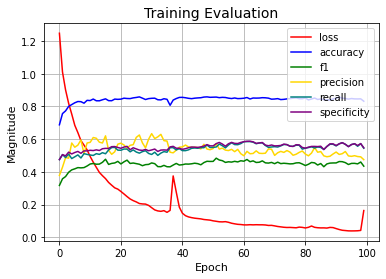

In [4]:
plt.plot(cmd.losses, label='loss', color='red')
plt.plot(cmd.accuracies, label='accuracy', color='blue')
plt.plot(cmd.f1s, label='f1', color='green')
plt.plot(cmd.precisions, label='precision', color='gold')
plt.plot(cmd.recalls, label='recall', color='teal')
plt.plot(cmd.specificities, label='specificity', color='purple')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=11)
plt.ylabel('Magnitude', fontsize=11)
plt.grid(True)
plt.legend()
plt.show()

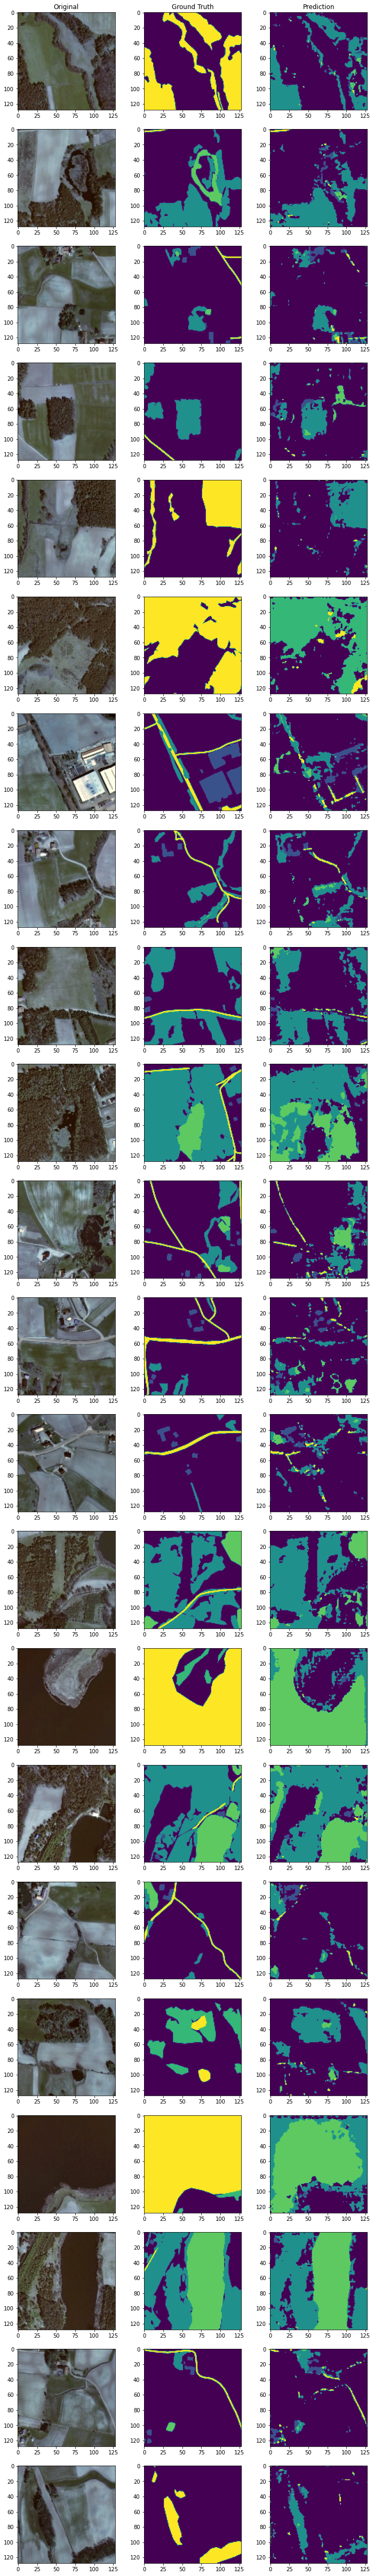

In [5]:
images = sorted(glob.glob("{}/*".format(test_images_dir)))
masks  = sorted(glob.glob("{}/*".format(test_masks_dir)))

dim = (img_width, img_height)

num_images = len(images)
num_cols   = 3

col_names = [
    "Original",
    "Ground Truth",
    "Prediction"
]

fig, axes = plt.subplots(nrows=num_images, ncols=num_cols, figsize=(num_cols*4, num_images*4))

for ax, col in zip(axes[0], col_names):
    ax.set_title(col)
    
counter = 0

scores = []

for i in range(num_images):
    image_file = images[i]
    mask_file  = masks[i]
    
    img  = get_image(image_file, dim)
    mask = get_mask(mask_file, dim)
    
    prediction = get_predicted_img(img, model)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(img)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(mask)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(prediction)
    
    mask_vectorized = mask.ravel().astype(int)
    prediction_vectorized = prediction.ravel().astype(int)
    
    macro_score = jaccard_score(mask_vectorized, prediction_vectorized, average='macro')
    label_score = jaccard_score(mask_vectorized, prediction_vectorized, average=None)
    
    label_specificity = recall_score(mask_vectorized, prediction_vectorized, labels=[0, 1, 2, 3, 4], average=None, zero_division=1)
    label_recall      = recall_score(mask_vectorized, prediction_vectorized, average=None, zero_division=1)
    
    f1          = f1_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    accuracy    = accuracy_score(mask_vectorized, prediction_vectorized)
    precision   = precision_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1)
    recall      = recall_score(mask_vectorized, prediction_vectorized, average='macro', zero_division=1) # sensitivity
    specificity = recall_score(mask_vectorized, prediction_vectorized, labels=[0, 1, 2, 3, 4], average='macro', zero_division=1)
    
    jaccard_score_0 = None
    jaccard_score_1 = None
    jaccard_score_2 = None
    jaccard_score_3 = None
    jaccard_score_4 = None
    
    specificity_0 = None
    specificity_1 = None
    specificity_2 = None
    specificity_3 = None
    specificity_4 = None
    
    recall_0 = None
    recall_1 = None
    recall_2 = None
    recall_3 = None
    recall_4 = None
    
    dice_0 = dice_score(mask_vectorized, prediction_vectorized, k=0)
    dice_1 = dice_score(mask_vectorized, prediction_vectorized, k=1)
    dice_2 = dice_score(mask_vectorized, prediction_vectorized, k=2)
    dice_3 = dice_score(mask_vectorized, prediction_vectorized, k=3)
    dice_4 = dice_score(mask_vectorized, prediction_vectorized, k=4)
    
    for i in range(len(label_score)):
        if i == 0:
            jaccard_score_0 = label_score[i]
        elif i == 1:
            jaccard_score_1 = label_score[i]
        elif i == 2:
            jaccard_score_2 = label_score[i]
        elif i == 3:
            jaccard_score_3 = label_score[i]
        elif i == 4:
            jaccard_score_4 = label_score[i]
            
    for i in range(len(label_specificity)):
        if i == 0:
            specificity_0    = label_specificity[i]
        elif i == 1:
            specificity_1    = label_specificity[i]
        elif i == 2:
            specificity_2    = label_specificity[i]
        elif i == 3:
            specificity_3    = label_specificity[i]
        elif i == 4:
            specificity_4    = label_specificity[i]
            
    for i in range(len(label_recall)):
        if i == 0:
            recall_0 = label_recall[i]
        elif i == 1:
            recall_1 = label_recall[i]
        elif i == 2:
            recall_2 = label_recall[i]
        elif i == 3:
            recall_3 = label_recall[i]
        elif i == 4:
            recall_4 = label_recall[i]
        
    
    
    scores.append({
        'image_file':  image_file,
        'mask_file':   mask_file,
        'jaccard_score': macro_score,
        'f1_score': f1,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'precision': precision,
        'specificity': specificity,
        'jaccard_score_0': jaccard_score_0,
        'jaccard_score_1': jaccard_score_1,
        'jaccard_score_2': jaccard_score_2,
        'jaccard_score_3': jaccard_score_3,
        'jaccard_score_4': jaccard_score_4,
        'specificity_0': specificity_0,
        'specificity_1': specificity_1,
        'specificity_2': specificity_2,
        'specificity_3': specificity_3,
        'specificity_4': specificity_4,
        'recall_0': recall_0,
        'recall_1': recall_1,
        'recall_2': recall_2,
        'recall_3': recall_3,
        'recall_4': recall_4,
        'dice_0': dice_0,
        'dice_1': dice_1,
        'dice_2': dice_2,
        'dice_3': dice_3,
        'dice_4': dice_4,
    })

plt.show()

In [6]:
df_scores = pd.DataFrame(scores)

df_scores

,image_file,mask_file,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,...,recall_0,recall_1,recall_2,recall_3,recall_4,dice_0,dice_1,dice_2,dice_3,dice_4
0,./tmp/test/images/N-33-60-D-c-4-2_0.png,./tmp/test/masks/N-33-60-D-c-4-2_0.tiff,0.295177,0.344809,0.844177,0.364838,0.735282,0.735282,0.818436,0.025229,...,0.964189,0.048458,0.663762,1.000000,1.000000,0.332390,0.023102,0.739085,0.025460,0.005186
1,./tmp/test/images/N-33-60-D-c-4-2_12.png,./tmp/test/masks/N-33-60-D-c-4-2_12.tiff,0.424370,0.517808,0.858215,0.629182,0.574035,0.574035,0.850004,0.022569,...,0.953604,0.068063,0.810124,0.111111,0.927273,0.287667,0.072105,0.703992,0.029408,0.025637
2,./tmp/test/images/N-33-60-D-c-4-2_13.png,./tmp/test/masks/N-33-60-D-c-4-2_13.tiff,0.403593,0.532821,0.909363,0.527743,0.561843,0.561843,0.915635,0.282895,...,0.938564,0.469945,0.773087,0.347826,0.279793,0.274875,0.063478,0.414231,0.032182,0.080307
3,./tmp/test/images/N-33-60-D-c-4-2_18.png,./tmp/test/masks/N-33-60-D-c-4-2_18.tiff,0.343710,0.410935,0.900085,0.454786,0.392914,0.392914,0.904847,0.034483,...,0.945864,0.123711,0.694996,0.000000,0.200000,0.253317,0.071820,0.601837,0.015218,0.018744
4,./tmp/test/images/N-33-60-D-c-4-2_19.png,./tmp/test/masks/N-33-60-D-c-4-2_19.tiff,0.313930,0.355249,0.901306,0.372523,0.743981,0.743981,0.893082,0.020690,...,0.973019,0.045802,0.701084,1.000000,1.000000,0.296317,0.030413,0.761998,0.001674,0.008789
5,./tmp/test/images/N-33-60-D-c-4-2_20.png,./tmp/test/masks/N-33-60-D-c-4-2_20.tiff,0.382115,0.436265,0.849731,0.441959,0.688470,0.750776,0.738187,0.009479,...,0.925020,0.012821,0.816039,1.000000,NaN,0.159147,0.003313,0.850302,0.032099,0.000000
6,./tmp/test/images/N-33-60-D-c-4-2_24.png,./tmp/test/masks/N-33-60-D-c-4-2_24.tiff,0.255703,0.351905,0.738953,0.441341,0.369690,0.369690,0.754440,0.205650,...,0.909822,0.220517,0.419204,0.169231,0.129676,0.627701,0.082533,0.286915,0.053121,0.088235
7,./tmp/test/images/N-33-60-D-c-4-2_27.png,./tmp/test/masks/N-33-60-D-c-4-2_27.tiff,0.372286,0.487176,0.858398,0.532015,0.475806,0.475806,0.866626,0.299363,...,0.923239,0.431193,0.610731,0.098765,0.315104,0.369877,0.056199,0.434722,0.033892,0.094242
8,./tmp/test/images/N-33-60-D-c-4-2_30.png,./tmp/test/masks/N-33-60-D-c-4-2_30.tiff,0.396523,0.494296,0.855164,0.557601,0.461820,0.461820,0.828157,0.180357,...,0.935338,0.279778,0.769662,0.000000,0.324324,0.237803,0.026461,0.748226,0.018453,0.031423
9,./tmp/test/images/N-33-60-D-c-4-2_37.png,./tmp/test/masks/N-33-60-D-c-4-2_37.tiff,0.255589,0.360415,0.581055,0.418699,0.386246,0.386246,0.438547,0.197492,...,0.861623,0.225806,0.599808,0.243993,0.000000,0.227525,0.004247,0.515726,0.295929,0.000487


In [7]:
df_scores.describe()

,jaccard_score,f1_score,accuracy,precision,recall,specificity,jaccard_score_0,jaccard_score_1,jaccard_score_2,jaccard_score_3,...,recall_0,recall_1,recall_2,recall_3,recall_4,dice_0,dice_1,dice_2,dice_3,dice_4
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,...,22.000000,22.000000,22.000000,22.000000,21.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.348539,0.435063,0.831945,0.474773,0.544629,0.547461,0.780263,0.141673,0.475271,0.211355,...,0.909033,0.220687,0.678191,0.449553,0.455071,0.271123,0.036739,0.511905,0.150098,0.044836
std,0.061734,0.073687,0.084952,0.087577,0.112717,0.117197,0.146584,0.139926,0.245311,0.294764,...,0.051775,0.217682,0.150058,0.397448,0.403731,0.138653,0.030231,0.199308,0.236281,0.057290
min,0.254143,0.316969,0.581055,0.331740,0.369690,0.369690,0.438547,0.000000,0.026735,0.000000,...,0.776226,0.000000,0.299699,0.000000,0.000000,0.069046,0.001150,0.141886,0.001674,0.000000
25%,0.301641,0.356541,0.788773,0.417087,0.467457,0.467457,0.671001,0.019821,0.282160,0.000000,...,0.888579,0.041856,0.602538,0.101852,0.129676,0.174791,0.007684,0.368912,0.019005,0.001132
50%,0.347339,0.444768,0.856689,0.494362,0.532456,0.532456,0.837391,0.109483,0.562424,0.073627,...,0.924130,0.146739,0.706311,0.337398,0.315104,0.263757,0.026992,0.475224,0.033037,0.013766
75%,0.395404,0.492516,0.895676,0.537969,0.596072,0.596072,0.898720,0.263583,0.686586,0.322394,...,0.947899,0.394290,0.799111,0.827537,1.000000,0.323372,0.061920,0.694668,0.149396,0.086737
max,0.478760,0.543307,0.921631,0.629182,0.743981,0.750776,0.930079,0.429498,0.780793,0.967930,...,0.973019,0.644531,0.851928,1.000000,1.000000,0.627701,0.101679,0.850302,0.788297,0.210136
